<a href="https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/frequentPattern/pyspark/parallelFPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Frequent Patterns in Big Data Using parallelFPGrowth Algorithm

In this tutorial, we will discuss the first approach to find frequent patterns in big data using parallelFPGrowth algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing parallelFPGrowth on a single dataset at a particular minimum support value</a>

#### Step 0: install required respositories and inputs

##### Step 0.1: Mounting to the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Step 0.2: Dowloading the transactional dataset

In [2]:
!wget 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

--2023-11-07 01:54:50--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.31.244.160, 150.95.161.176
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.31.244.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv’

Transactional_T10I4 100%[===================>]   3.83M   835KB/s    in 7.3s    

2023-11-07 01:54:59 (539 KB/s) - ‘Transactional_T10I4D100K.csv’ saved [4019277/4019277]



##### Step 0.3: install pami repository

In [3]:
!pip install -U 'pami[spark]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=3461041e0cbfc0e54ca33208c05b0a552cb8931b3cf2ba531eac24630c33baef
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=a4cf9e5e78d11b6abb28e8da293b385c5e9aefca795f90098ccda0b3af2a2651
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for Json

#### Step 1: Import the parallelFPGrowth algorithm

In [4]:
from PAMI.frequentPattern.pyspark import parallelFPGrowth  as alg

#### Step 2: Specify the following input parameters

In [5]:
inputFile = 'Transactional_T10I4D100K.csv'

minimumSupportCount=1000  #Users can also specify this constraint between 0 to 1.
mumberWorkersCount=4
seperator='\t'

#### Step 3: Execute the parallelFPGrowth algorithm

In [6]:
obj = alg.parallelFPGrowth(iFile=inputFile, minSup=minimumSupportCount,numWorkers=mumberWorkersCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

Frequent patterns were generated successfully using Parallel FPGrowth algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 385


##### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 52.74297761917114


##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 156061696
Memory (USS): 107044864


# Advanced Tutorial on Implementing parallelFPGrowth Algorithm

 In this tutorial, we will discuss the second  approach to find frequent patterns in big data using parallelFPGrowth algorithm.



 [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the parallel Frequent Pattern Growth (parallelFPGrowth) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the parallelFPGrowth algorithm and pandas data frame

In [12]:
from PAMI.frequentPattern.pyspark import parallelFPGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [13]:
inputFile = 'Transactional_T10I4D100K.csv'
seperator='\t'
mumberWorkersCount=4
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of parallelFPGrowth algorithm

#### Step 3: Execute the parallelFPGrowth algorithm using a for loop

In [14]:
algorithm = 'parallelFPGrowth'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.parallelFPGrowth(inputFile, minSup=minSupCount,numWorkers=mumberWorkersCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent patterns were generated successfully using Parallel FPGrowth algorithm
Frequent patterns were generated successfully using Parallel FPGrowth algorithm
Frequent patterns were generated successfully using Parallel FPGrowth algorithm
Frequent patterns were generated successfully using Parallel FPGrowth algorithm
Frequent patterns were generated successfully using Parallel FPGrowth algorithm


In [15]:
print(result)

          algorithm  minSup  patterns    runtime     memory
0  parallelFPGrowth    1000       385  37.890740  157667328
1  parallelFPGrowth    1500       237  23.511300  158306304
2  parallelFPGrowth    2000       155  17.560783  158720000
3  parallelFPGrowth    2500       107  14.560368  158720000
4  parallelFPGrowth    3000        60  10.852414  158720000


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

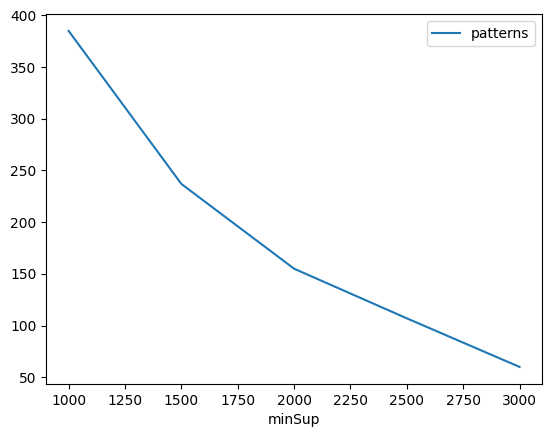

Graph for No Of Patterns is successfully generated!


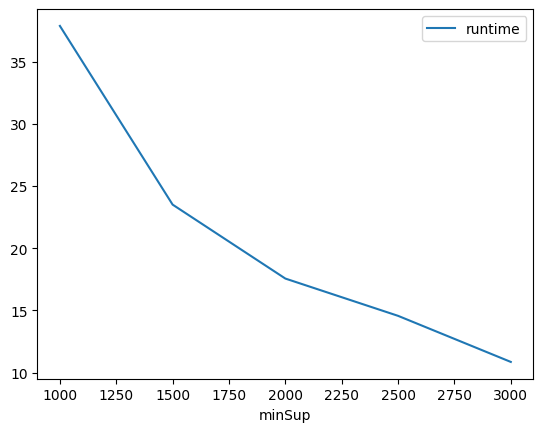

Graph for Runtime taken is successfully generated!


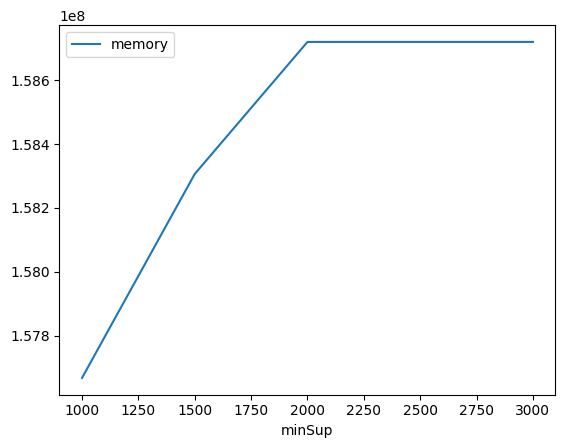

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [18]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
